<a href="https://colab.research.google.com/github/svnesh/MachineLearning/blob/master/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/My Drive/house_price_prediction"

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
df = pd.read_csv(os.path.join(root_path, 'kc_house_data.csv'))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.shape

(21613, 21)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [0]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


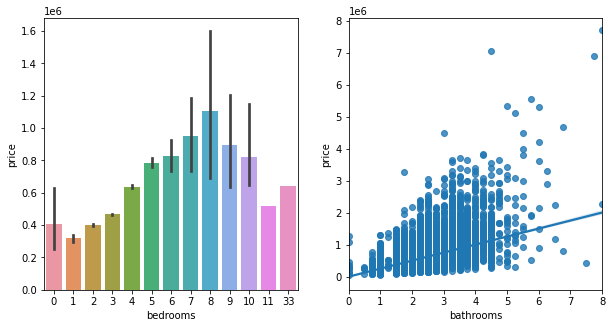

In [0]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
fig.add_subplot(1,2,1)
f1 = sns.barplot('bedrooms', 'price', data=df)
fig.add_subplot(1,2,2)
f2 = sns.regplot('bathrooms', 'price', data=df)
plt.show()

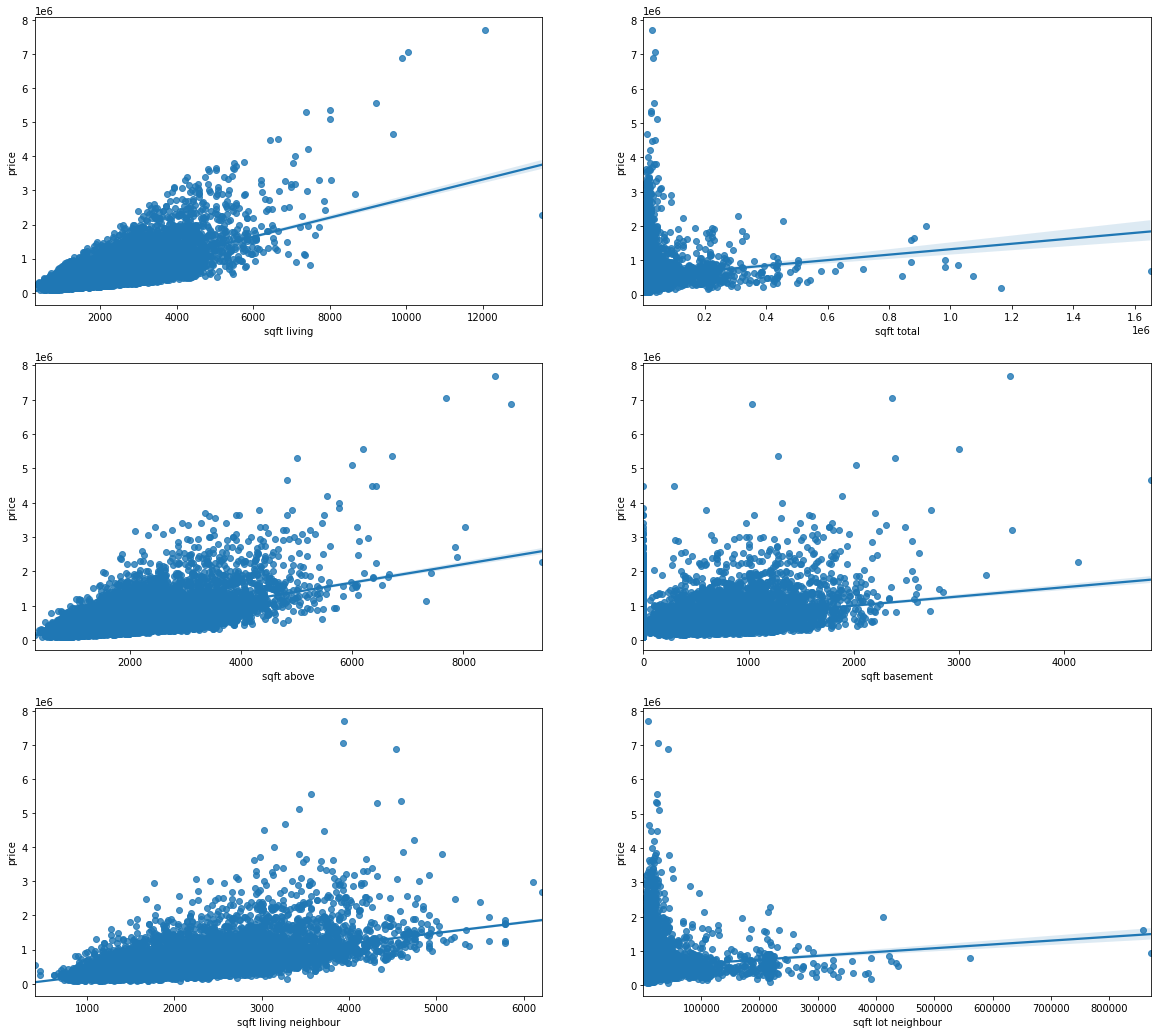

In [0]:
sqft = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
sqft_label = ['sqft living', 'sqft total', 'sqft above', 'sqft basement', 'sqft living neighbour', 'sqft lot neighbour']

fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

for i in range(len(sqft)):
  ax = fig.add_subplot(3,2,i+1)
  sns.regplot(sqft[i], 'price', data=df)
  ax.set_xlabel(sqft_label[i])
  ax.set_ylabel('price')
plt.ylim()
plt.show()

In [0]:
bins = np.linspace(min(df['sqft_living']), max(df['sqft_living']), 4)
group_name = ['small', 'medium', 'large']
df['sqrt_living_bin'] = pd.cut(df['sqft_living'], bins, labels=group_name, include_lowest=True)
df['sqrt_living_bin']

0        small
1        small
2        small
3        small
4        small
         ...  
21608    small
21609    small
21610    small
21611    small
21612    small
Name: sqrt_living_bin, Length: 21613, dtype: category
Categories (3, object): [small < medium < large]

In [0]:
df['sqrt_living_bin'].value_counts()

small     21331
medium      276
large         6
Name: sqrt_living_bin, dtype: int64

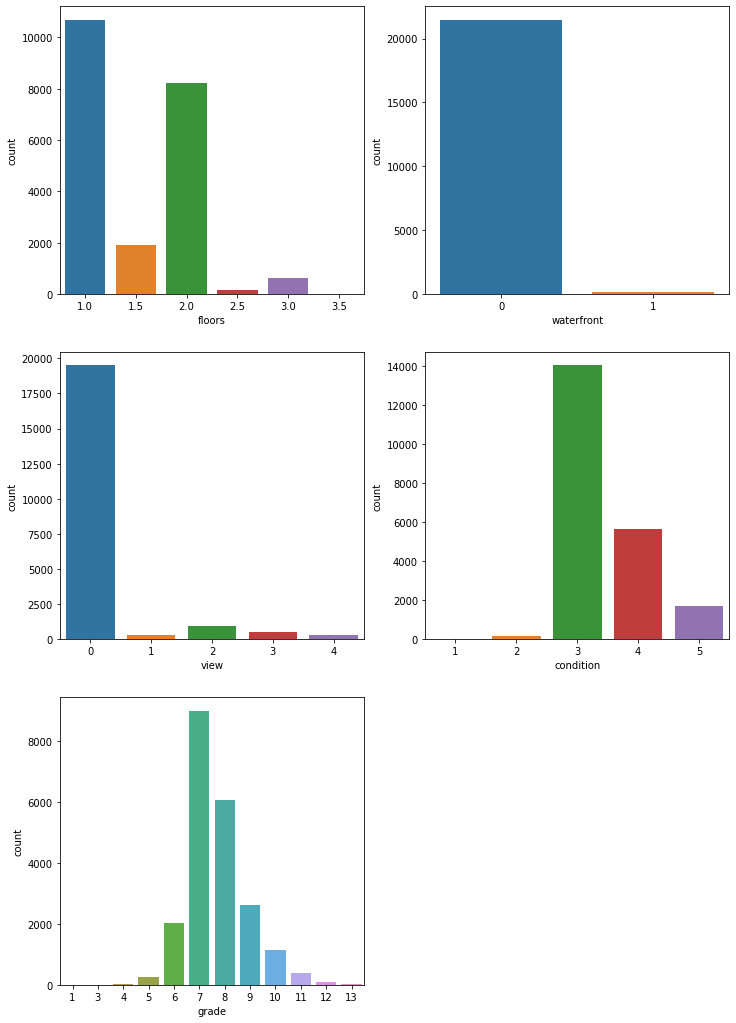

In [0]:
countPlot = ['floors', 'waterfront', 'view', 'condition', 'grade']
fig = plt.figure(figsize=(12,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(len(countPlot)):
  fig.add_subplot(3,2,i+1)
  sns.countplot(x=countPlot[i], data=df)
plt.show()

In [0]:
yr_bin = np.linspace(min(df['yr_built']), max(df['yr_built']), 4)
yr_label = ['old', 'mid', 'new']
df['yr_build_binned'] = pd.cut(df['yr_built'], yr_bin, labels=yr_label, include_lowest=True)
df['yr_build_binned'].value_counts()

new    10426
mid     8120
old     3067
Name: yr_build_binned, dtype: int64

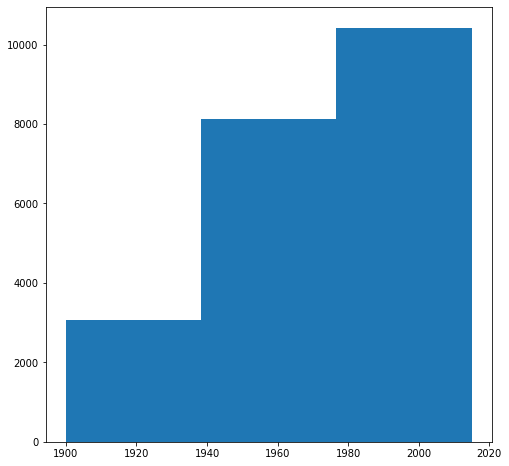

In [0]:
plt.figure(figsize=(8,8))
plt.hist(df['yr_built'], bins=3)
plt.show()

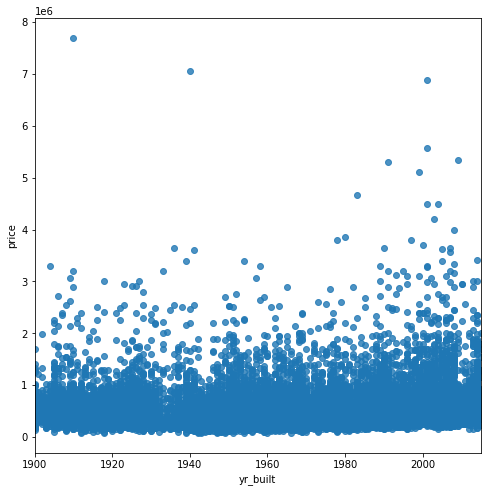

In [0]:
plt.figure(figsize=(8,8))
sns.regplot(x='yr_built', y='price', data=df)
plt.show()

In [0]:
df[['bedrooms','bathrooms','sqft_living','sqft_lot','price']].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,price
bedrooms,1.000000,0.515884,0.576671,0.031703,0.308350
bathrooms,0.515884,1.000000,0.754665,0.087740,0.525138
sqft_living,0.576671,0.754665,1.000000,0.172826,0.702035
sqft_lot,0.031703,0.087740,0.172826,1.000000,0.089661
price,0.308350,0.525138,0.702035,0.089661,1.000000


In [0]:
df_1 = df[['bedrooms', 'price']]
df_1.groupby(['bedrooms'], as_index=False).mean()

,bedrooms,price
0,0,4.095038e+05
1,1,3.176429e+05
2,2,4.013727e+05
3,3,4.662321e+05
4,4,6.354195e+05
5,5,7.865998e+05
6,6,8.255206e+05
7,7,9.511847e+05
8,8,1.105077e+06
9,9,8.939998e+05


In [0]:
! pip install scipy
from scipy import stats

In [0]:
bedroom_coef, p_value1 = stats.pearsonr(df['bedrooms'], df['price'])
bathroom_coef, p_value2 = stats.pearsonr(df['bathrooms'], df['price'])
print(f'The value of coeffecient: {bedroom_coef} & p_value is {p_value1}')
print(f'The value of coeffecient: {bathroom_coef} & p_value is {p_value2}')

The value of coeffecient: 0.3083495981456382 & p_value is 0.0
The value of coeffecient: 0.5251375054139618 & p_value is 0.0


In [0]:
df_group1 = df[['grade','price']]
df_grade = df_group1.groupby('grade').mean()
df_grade

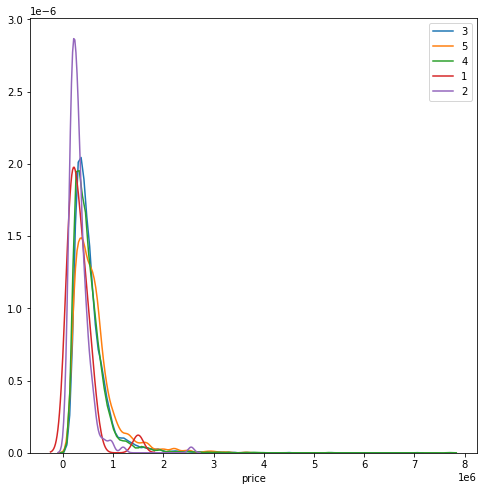

In [0]:
df_grade_values = list(df['condition'].unique())
plt.figure(figsize=(8,8))
for i in df_grade_values:
  sns.distplot(df[df['condition'] == i]['price'], hist=False, label=str(i))
plt.show()

In [0]:
#df['waterfront'].value_counts()
#df['view'].value_counts()
#df['sqft_basement'].value_counts()
#df['yr_renovated'].value_counts()
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
df_final = df.copy()
cols = ['bedrooms','bathrooms','floors','view','condition','grade','sqft_living','sqft_lot', 'sqft_living15','price']

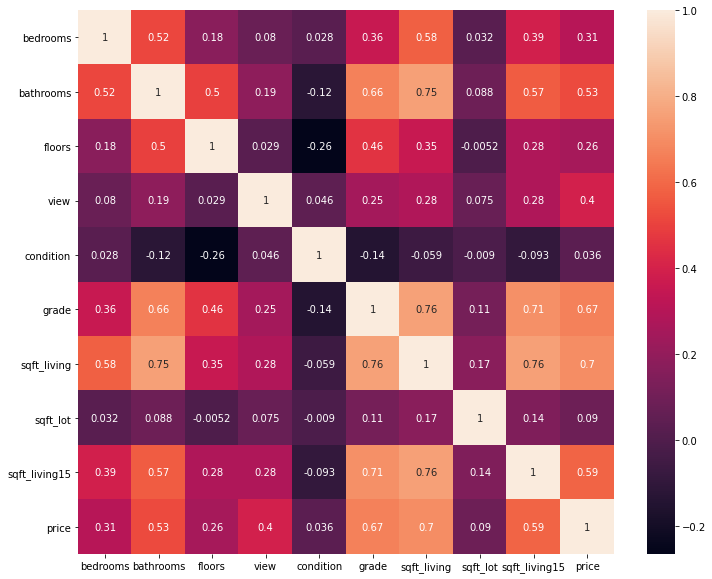

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(df[cols].corr(),fmt='.2g',annot=True, cbar=True)
plt.show()

In [0]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [0]:
evaluation = pd.DataFrame({'model':[],
                           'mean square error':[],
                           'R2 value train':[],
                           'Adjusted R2 value':[],
                           'R2 value test':[],
                           'cross val score':[]})

In [0]:
np.array(df['sqft_living'], dtype=pd.Series).reshape(-1,1)

(21613, 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[['sqft_living']], df['price'], train_size=0.75, random_state=3)

In [0]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

In [0]:
#intercept = float(format(lm.intercept_, '.3f'))
#coeffic = float(format(lm.coef_, '.3f'))
r2_train = float(format(lm.score(X_train, y_train), '.3f'))
r2_test = float(format(lm.score(X_test, y_test), '.3f'))
msqerror = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))
crvalScore = float(format(cross_val_score(lm, df[['sqft_living']], df['price'], cv=5).mean(), '.3f'))

In [0]:
r = evaluation.shape[0]
evaluation.loc[r] = ['simple linear regression', msqerror, r2_train, '-', r2_test, crvalScore]
evaluation

,model,mean square error,R2 value train,Adjusted R2 value,R2 value test,cross val score
0,simple linear regression,258870.726,0.491,-,0.498,0.491


In [0]:
lm.coef_

array([280.37881209])

In [0]:
print(f"Training R2: {lm.score(X_train, y_train)}")
print(f"Testing R2: {lm.score(X_test, y_test)}")

Training R2: 0.49130359724432726
Testing R2: 0.49753871219817647


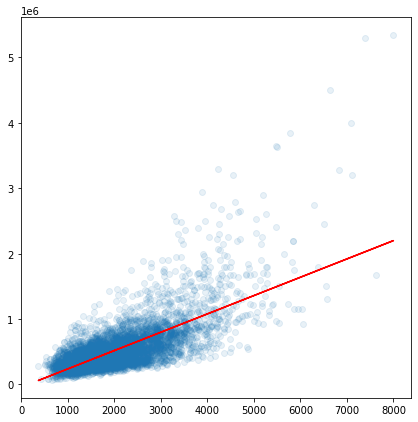

In [0]:
plt.figure(figsize=(7,7))
plt.scatter(X_test, y_test, alpha=.1)
plt.plot(X_test, lm.predict(X_test), color='Red')
plt.show()